# Modelling viral and immune dynamics 

#### A model of viral strain competition from "Host–virus evolutionary dynamics with specialist and generalist infection strategies: Bifurcations, bistability, and chaos" - AIP Chaos (2020)

## The model

The model is a set of Ordinary Differential Equations with seven compartments:

* $z$, the general strain of a virus 

* $z^s$, the specialist strain of a virus 

* $x_1$, susceptible target cells that can be infected by specialist and general strains of a virus 

* $x_2$, susceptible target cells that can only be infected by a general strain of a virus 

* $y_1$, infected $x_1$ cells that are infected by the general strain

* $y_1^s$, infected $x_1$ cells that are infected by the specialist strain

* $y_2$, infected $x_2$ cells


It is assumed that the uninfected cells have growth rates $\beta_i$ and $\delta_i$, where $\beta_i>\delta_i$,$\beta_1\neq\beta_2$ and $\delta_1\neq\delta_2$ to ensure the cell populations don't completely die out and to establish two different cell populations. The cell populations also undergo logistic growth, leading to:
$$\dot{x}_1=\beta_1x_1\bigg(1-\frac{x_1+x_2}{K}\bigg)-\delta_1x_1$$

$$\dot{x}_2=\beta_2x_2\bigg(1-\frac{x_1+x_2}{K}\bigg)-\delta_2x_2$$

Infection by the generalist and specialist viral strains occur at rates $\alpha$ and $\alpha^s$, leading to two additional terms in the evolution equation of $x_1$ and a single term in the evolution equation of $x_2$:
$$\dot{x}_1=\beta_1x_1\bigg(1-\frac{x_1+x_2}{K}\bigg)-x_1\alpha z-x_1\alpha^sz^s-\delta_1x_1$$

$$\dot{x}_2=\beta_2x_2\bigg(1-\frac{x_1+x_2}{K}\bigg)-x_2\alpha z - \delta_2 x_2$$

These infections are reflected in the infected cell evolution equations by including identical terms:
$$\dot{y}_1 = x_1\alpha z$$

$$\dot{y}_1^s = x_1\alpha^s z^s$$

$$\dot{y}_2 = x_2\alpha z$$

However it is also assumed that these cells die at different rates $\gamma_1$, $\gamma_1^s$ and $\gamma_2$ as a result of being infected: 
$$\dot{y}_1 = x_1\alpha z - \gamma_1y_1$$

$$\dot{y}_1^s = x_1\alpha^s z^s-\gamma_1^sy^s_1$$

$$\dot{y}_2 = x_2\alpha z- \gamma_2y_2$$

Mutation from $z_1$ to $z_1^s$ is modelled by including a cross term $\mu y_1$ that links the comparments $y_1$ and $y_1^s$:
$$\dot{y}_1 = x_1\alpha z - \gamma_1y_1 - \mu y_1$$

$$\dot{y}_1^s = x_1\alpha^s z^s-\gamma_1^sy^s_1 +\mu y_1$$

The by accounting through the effects of cell lysis through factors $\kappa^s$, $\kappa_1$ and $\kappa_2$, viral population growth and decay is described by the respective terms in each evolution equation:

$$\dot{z}^s=\kappa^s\gamma^s_1y^s_1-\zeta^sz^s$$

$$\dot{z}=\kappa_1\gamma_1y_1+\kappa_2\gamma_2y_2-\zeta_z$$

However the multiplicity of infection is accounted for by factors $\nu^s$ and $\nu$, leading to:

$$\dot{z}^s=\kappa^s\gamma^s_1y^s_1-\nu^s\alpha^sz^sx_1-\zeta^sz^s$$

$$\dot{z}=\kappa_1\gamma_1y_1+\kappa_2\gamma_2y_2-\nu\alpha z(x_1+x_2)-\zeta z$$

## Initial simulations

In [1]:
from Model import Model

params = {'alpha': 0.5,
         'alpha_s':0.7,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_as_07 = Model(params = params)
model_as_07.run()

Simulation beginning for 80000 time steps.
Number of dimensions: 7
Simulation complete!


,Time,x1,x2,ys1,y1,y2,zs,z
0,0.0,1.000000,0.050000,0.000000,0.000000e+00,0.000000e+00,0.010000,5.000000e-01
1,0.1,0.971951,0.046104,0.000782,2.364341e-02,1.157343e-03,0.009460,4.769547e-01
2,0.2,0.948533,0.042808,0.001715,4.481903e-02,2.151355e-03,0.008979,4.558910e-01
3,0.3,0.928916,0.039983,0.002779,6.384478e-02,3.009356e-03,0.008554,4.365762e-01
4,0.4,0.912453,0.037534,0.003960,8.098419e-02,3.752799e-03,0.008184,4.188147e-01
...,...,...,...,...,...,...,...,...
79995,7999.5,0.643192,0.008891,0.902641,1.619765e-217,1.668365e-219,0.502981,1.347392e-217
79996,7999.6,0.642922,0.009066,0.902719,1.606458e-217,1.686673e-219,0.503158,1.336737e-217
79997,7999.7,0.642652,0.009246,0.902794,1.593255e-217,1.705227e-219,0.503334,1.326165e-217
79998,7999.8,0.642379,0.009429,0.902865,1.580156e-217,1.724030e-219,0.503508,1.315675e-217


In [ ]:
#model.run()

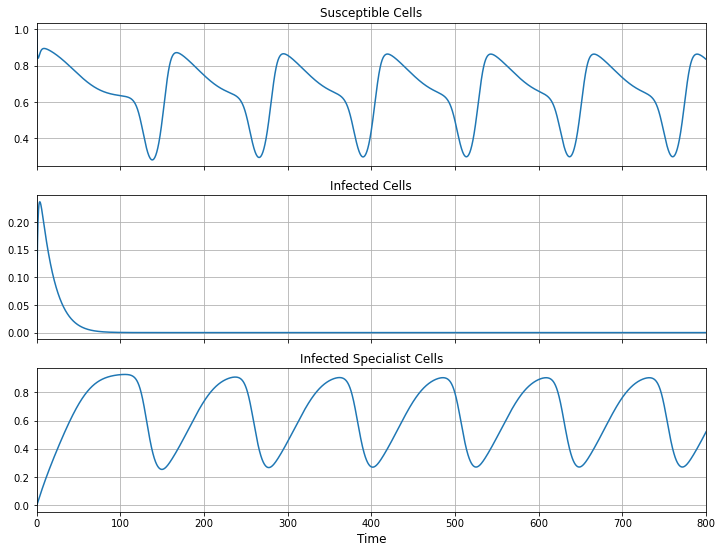

In [4]:
model_as_07.plot_specialist_cells(xmax = 800)

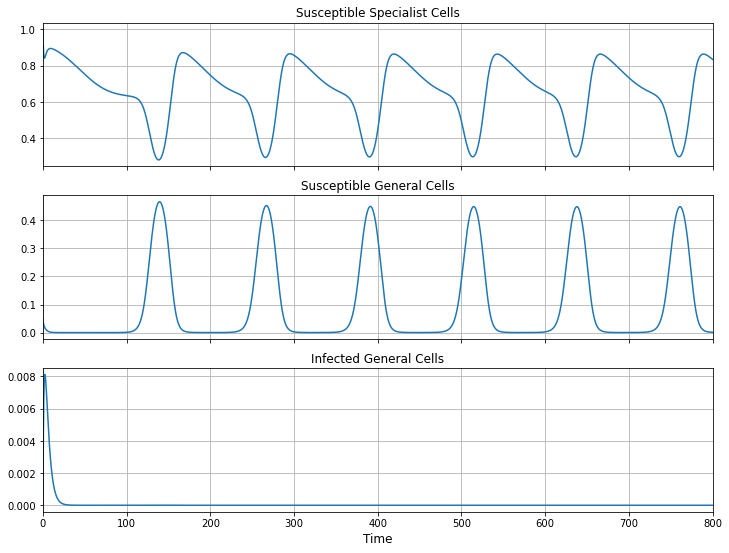

In [5]:
model_as_07.plot_general_cells(xmax = 800)

In [6]:
params = {'alpha': 0.5,
         'alpha_s':1.2,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_as_12 = Model(params = params)
model_as_12.run()

Simulation beginning for 80000 time steps.
Number of dimensions: 7
Simulation complete!


,Time,x1,x2,ys1,y1,y2,zs,z
0,0.0,1.000000,0.050000,0.000000,0.000000e+00,0.000000e+00,0.010000,5.000000e-01
1,0.1,0.971514,0.046106,0.001241,2.363799e-02,1.157362e-03,0.009236,4.769574e-01
2,0.2,0.947763,0.042815,0.002562,4.480007e-02,2.151488e-03,0.008575,4.559002e-01
3,0.3,0.927891,0.039997,0.003958,6.380730e-02,3.009741e-03,0.008008,4.365940e-01
4,0.4,0.911231,0.037555,0.005422,8.092534e-02,3.753586e-03,0.007527,4.188422e-01
...,...,...,...,...,...,...,...,...
79995,7999.5,0.024829,0.727851,0.013913,6.740878e-197,3.893614e-195,0.053073,2.509415e-195
79996,7999.6,0.025291,0.727456,0.013726,6.817815e-197,3.887586e-195,0.052182,2.506016e-195
79997,7999.7,0.025763,0.727051,0.013543,6.897434e-197,3.881536e-195,0.051305,2.502619e-195
79998,7999.8,0.026247,0.726637,0.013366,6.979766e-197,3.875463e-195,0.050443,2.499225e-195


In [ ]:
model_as_12.plot_specialist_cells(xmax = 800)

In [ ]:
model_as_12.plot_general_cells(xmax = 800)

In [ ]:
params = {'alpha': 0.5,
         'alpha_s':1.6,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_as_16 = Model(params = params)
model_as_16.run()

In [ ]:
model_as_16.plot_specialist_cells(xmax = 800)

In [ ]:
model_as_16.plot_general_cells(xmax = 800)

In [ ]:
params = {'alpha': 0.5,
         'alpha_s':2.0,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_as_20 = Model(params = params)
model_as_20.run()

In [ ]:
model_as_20.plot_specialist_cells(xmax = 800)

In [ ]:
model_as_20.plot_general_cells(xmax = 800)

### Multi-Models

In [7]:
params_1 = {'alpha': 0.5,
         'alpha_s':2.0,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_1 = Model(params = params_1)

params_2 = {'alpha': 0.8,
         'alpha_s':2.0,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
          'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_2 = Model(params = params_2)

params_3 = {'alpha': 0.9,
         'alpha_s':2.0,
         'beta_1':1.5,
         'beta_2':2.0,
         'mu':0.1,
         'gamma_1_s':0.25,
         'gamma_1':0.25,
         'gamma_2':0.25,
         'nu':0.5,
         'nu_s':0.5,
         'zeta':0.22,
         'zeta_s':0.22,
         'kappa_1':1.00,
         'kappa_2':1.00}

model_3 = Model(params = params_3)

models = [model_1, model_2, model_3]
params = [params_1, params_2, params_3]

from Model import MultiModel

multi_model = MultiModel(models, params)

In [8]:
multi_model.run()

Simulation beginning for 80000 time steps.
Number of dimensions: 7
Simulation complete!
Simulation beginning for 80000 time steps.
Number of dimensions: 7
Simulation complete!
Simulation beginning for 80000 time steps.
Number of dimensions: 7
Simulation complete!


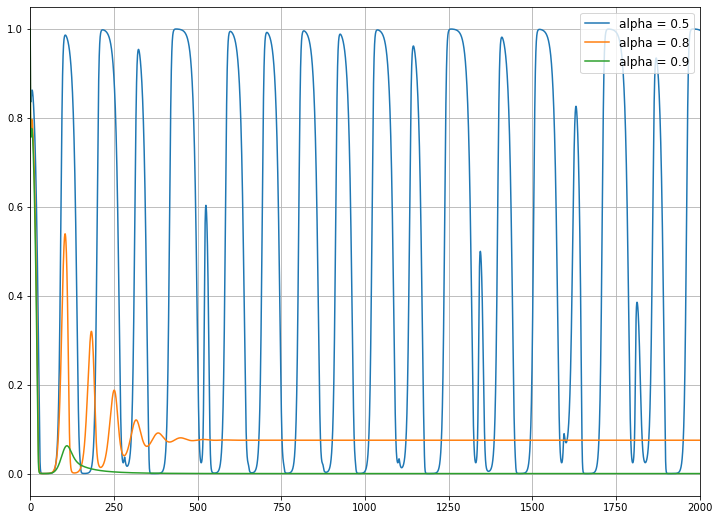

In [9]:
multi_model.plot('x1', 'alpha', [0.5, 0.8, 0.9], xmax = 2000)